# Self Study 1

This self study sheet contains some code, and some questions. You should first walk through the code, and then work on the questions. The questions can be answered by extending this notebook with some additional code and text ("markdown") cells. A brief guide to formatting in markdown cells is here:<br>
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed<br>


The following just gives us some tools we'll need

In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from scipy.stats import multivariate_normal as mvn


In [17]:
# A small utility we shall need later:
def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single n-dimensional array of predictions)
    '''
    return np.argmax(A,axis=1)
    

We load the Iris dataset and inspect what it is about. Iris is probably the most heavily used dataset in machine learning. It even has its own Wikipedia page: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [18]:
irisdata = load_iris()

print(irisdata.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

The Iris data contains 4 features. In order to facillitate visualization of decision regions,
it is better to use two features only, that then can be plotted in 2D. Here we select
two features, and make a scatter plot of their values:

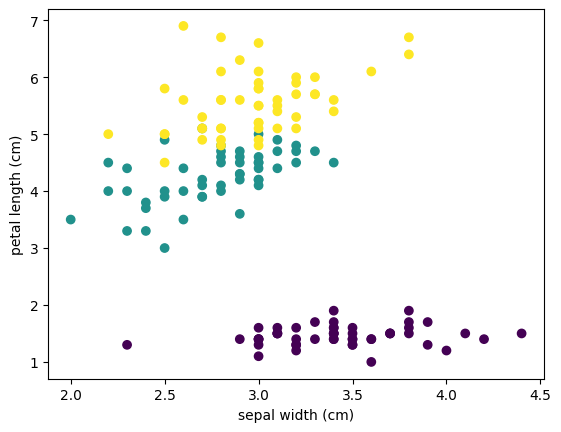

In [19]:
feat1 = 1
feat2 = 2
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target)
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

We next define and train several classification models. We continue to only use the first two features of the data.

First, the **K nearest neighbor** model. To define the model, we have to select the value of K, here called n_neighbors. The .fit function is the generic function for model training. For the K nearest neighbor model there is no actual training, however. 

In [20]:
irisknn = KNeighborsClassifier(n_neighbors=3)
irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


KNeighborsClassifier(n_neighbors=3)

The following defines three different linear models: Linear regression is the same as 'Least squares regression on the slides of the first lecture; logistic regression and linear support vector machine will be studied in more detail in the following lectures. For now we need to know that for each of the models we first specify the desired model class, and then fit (or 'train', or 'learn') the model based on our labeled training data. The linear regression model requires the label information in a different format from the other two models, which is why we first construct the 'one hot encoding' representation. After the models have been fitted, they each define a linear decision boundary, and can classify unlabeled examples. 

In [21]:
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size): 
    onehotclasses[i][irisdata.target[i]]=1.0
  
irislinreg = LinearRegression()
irislinreg.fit(irisdata.data[:,[feat1,feat2]],onehotclasses)

irislogreg = LogisticRegression()
irislogreg.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

irislinsvc = SVC(kernel='linear')
irislinsvc.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


SVC(kernel='linear')

Plotting labeled data points and decision regions. First, a meshgrid is constructed consisting of a fine grid of points that we classify, and then use for visualization of the decision regions. Then, our classifier is applied to the grid (uncomment the pair of lines you want for either knn or one of the linear models).


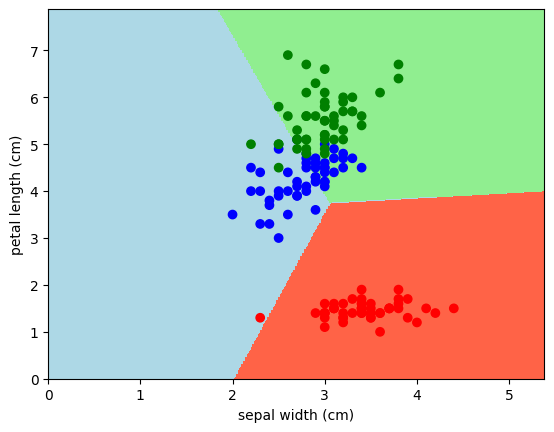

In [22]:
# maximal values found in the data for the two selected features
# Used to adjust the ranges of axes in the plot
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

# The np.meshgrid function takes two array arguments: x-array,y-array of sizes x-numpoints and y-numpoints, respectively.
# We created these arrays using np.arange.
# It returns two two-dimensional arrays of size (x-numpoints x y-numpoints), where xx contains the x-coordinates of all pairs of points with
# an x coordinate in x-array, and a y-coordinate in y-array. Similarly, yy contains the corresponding y-coordinates
xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

# With np.c_[xx.ravel(),yy.ravel()] we create an (x-numpoints * y-numpoints)x2 - dimensional array that simply contains all 
# (x,y) pairs with x in x-array and y in y-array

# Uncomment one of the following to select a classification model:

Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = maxpos(Z) # Here we have to turn the vector returned by LinearRegression into a categorical prediction

#Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()])

#Z = irislinsvc.predict(np.c_[xx.ravel(), yy.ravel()])

# Z is the vector of predictions of length x-numpoints * y-numpoints. We reshape it back into a 2-dimensional array:

Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

**Exercise 1** Visualize and describe the decision boundaries obtained from the KNN classifier and the linear regression classifier. Use different values of K in the KNN classifier, and also consider different selections of predictive features. This does not require any extension of the code.

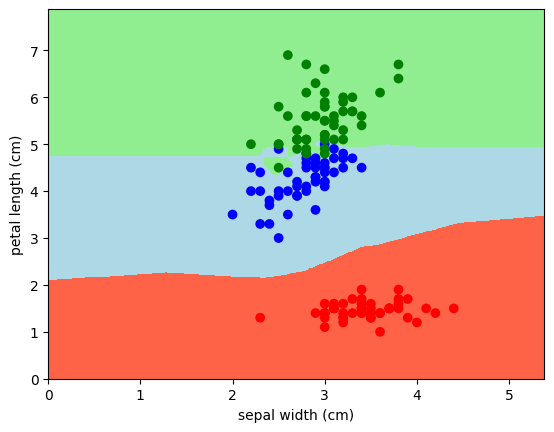

In [23]:
#K == 1
irisknn = KNeighborsClassifier(n_neighbors=1)
irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

# maximal values found in the data for the two selected features
# Used to adjust the ranges of axes in the plot
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))
Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

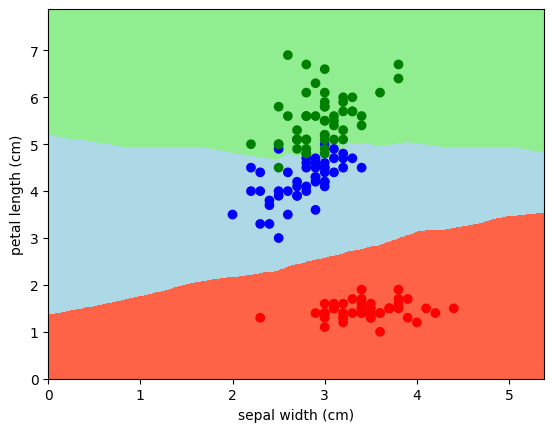

In [24]:
#K == 5
irisknn = KNeighborsClassifier(n_neighbors=5)
irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

# maximal values found in the data for the two selected features
# Used to adjust the ranges of axes in the plot
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))
Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

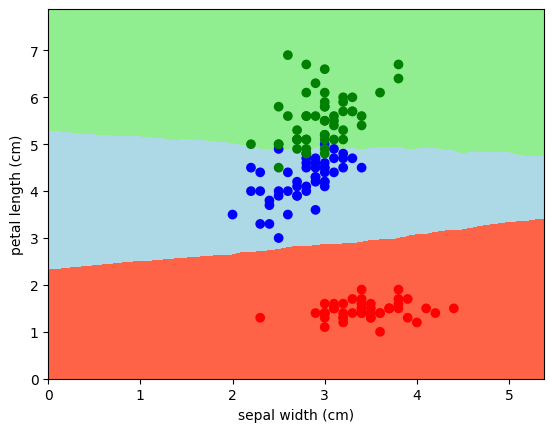

In [25]:
#K == 50
irisknn = KNeighborsClassifier(n_neighbors=50)
irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

# maximal values found in the data for the two selected features
# Used to adjust the ranges of axes in the plot
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))
Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

**Exercise 2:** Divide the data into 70% training and 30% test data. Learn KNN and linear regression classifiers from the training data, and evaluate their accuracy both on the training and test data. For the KNN classifier,
draw the curves that show train/test accuracy as a function of K. Useful sklearn functions:<br>
`sklearn.model selection.train test split`<br>
`sklearn.metrics.accuracy score`<br>
`sklearn.metrics.confusion matrix`

1
Train score: 0.9142857142857143
Test score: 0.4222222222222222
2
Train score: 0.7142857142857143
Test score: 0.4222222222222222
3
Train score: 0.6476190476190476
Test score: 0.4222222222222222
4
Train score: 0.6190476190476191
Test score: 0.35555555555555557
5
Train score: 0.6095238095238096
Test score: 0.3333333333333333
6
Train score: 0.5238095238095238
Test score: 0.3333333333333333
7
Train score: 0.5238095238095238
Test score: 0.26666666666666666
8
Train score: 0.42857142857142855
Test score: 0.2222222222222222
9
Train score: 0.42857142857142855
Test score: 0.3333333333333333
10
Train score: 0.45714285714285713
Test score: 0.26666666666666666
11
Train score: 0.4
Test score: 0.28888888888888886
12
Train score: 0.4
Test score: 0.24444444444444444
13
Train score: 0.3904761904761905
Test score: 0.3111111111111111
14
Train score: 0.42857142857142855
Test score: 0.28888888888888886
15
Train score: 0.41904761904761906
Test score: 0.26666666666666666
16
Train score: 0.47619047619047616
T

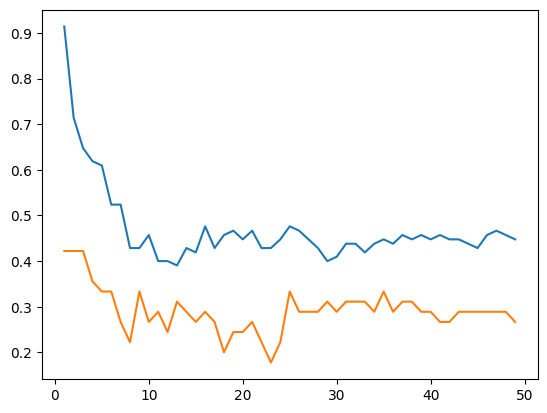

In [59]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

x = irisdata.data[:,[feat1,feat2]]
y = irisdata.target


trainX, testX= model_selection.train_test_split(x, train_size=0.7,test_size=0.3)
trainY, testY = model_selection.train_test_split(y,train_size=0.7,test_size=0.3)

train_scores = []
test_scores = []

for i in range(1,50):
    
    irisknn = KNeighborsClassifier(n_neighbors=i)
    irisknn.fit(trainX,trainY)

    Z = irisknn.predict(trainX)
    Z1 = irisknn.predict(testX)

    train_scores.append(accuracy_score(trainY, Z))
    test_scores.append(accuracy_score(testY, Z1))
    print(i)
    print("Train score: " + str(train_scores[-1]))
    print("Test score: " + str(test_scores[-1]))





plt.plot(range(1,50), train_scores)
plt.plot(range(1,50), test_scores)
plt.show()
#plt.scatter(trainX[feat1],trainX[feat2],c=trainY, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
#plt.xlabel(irisdata['feature_names'][feat1])
#plt.ylabel(irisdata['feature_names'][feat2])
#plt.show()





**Exercise 3:**  Also perform (some) of the previous experiments using the full set of 4 predictive features. How does that
change the classification performance? Which of the 3 Iris classes is easiest to classify? Why?

We now leave the Iris data behind, and consider a synthetic example of a dataset that is linearly separable, but 
for which many classifiers may end up making at least one wrong prediction (and perhaps for a good reason):

In [ ]:
gauss1= mvn(mean=(-2,-2),cov=((1,0),(0,1))).rvs(random_state=1,size=100)
gauss2= mvn(mean=(3.5,0),cov=((0.1,0),(0,0.1))).rvs(random_state=1,size=100)
X=np.vstack([gauss1,gauss2])
X=np.vstack([X,(0.5,-1)])
Y=np.hstack([np.zeros(100),np.ones(101)])

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

Prepare a meshgrid for the visualization of decision regions:


In [ ]:
leftx=np.min(X[:,0])-0.5
rightx=np.max(X[:,0])+0.5
lefty=np.min(X[:,1])-0.5
righty=np.max(X[:,1])+0.5

xx, yy = np.meshgrid(np.arange(leftx, rightx, 0.02), np.arange(lefty, righty, 0.02))


**Exercise 4**: Can you find classifiers that classify the yellow 'outlier' point as purple, and another one that classifies it as yellow (and also classifies all other points correctly)?